In [ ]:
# Mengimpor library yang diperlukan
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

# Mengatur agar visualisasi muncul di dalam notebook
%matplotlib inline

In [ ]:
# Import libraries
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

In [ ]:
# Gantilah 'your_dataset.csv' dengan nama file sebenarnya atau URL dataset Anda
dataset = pd.read_csv('/content/Obesity Classification.csv')

# Tampilkan beberapa baris pertama dari dataset untuk memastikan pengambilan data berfungsi
print(dataset.head())

   ID  Age  Gender  Height  Weight   BMI          Label
0   1   25    Male     175      80  25.3  Normal Weight
1   2   30  Female     160      60  22.5  Normal Weight
2   3   35    Male     180      90  27.3     Overweight
3   4   40  Female     150      50  20.0    Underweight
4   5   45    Male     190     100  31.2          Obese


#**cek dataset**

cleaning data terlebih dahulu

In [ ]:
#menampilkan ukuran data dan jumlah missing value
print(f"\nThe dataset has {dataset.shape[0]} rows and {dataset.shape[1]} columns with {dataset.isnull().sum().sum()} null values.\n\n")


The dataset has 108 rows and 7 columns with 0 null values.




In [ ]:
#mengecek missing values
dataset.isnull().sum()

ID        0
Age       0
Gender    0
Height    0
Weight    0
BMI       0
Label     0
dtype: int64

#**visualisasi ekplorasi data**

memvisualisasikan secara linear

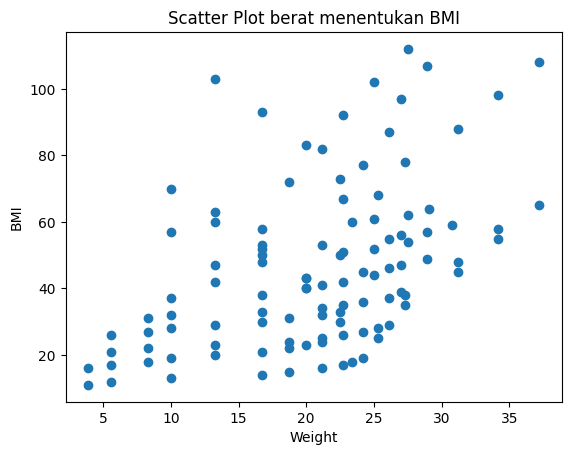

In [ ]:
# Split the dataset into features (X) and target (y)
X = dataset.drop("Label", axis=1)
X = dataset.drop("Gender", axis=1)
y = dataset["Age"]

# Visualize the data (example: scatter plot)
plt.scatter(X['BMI'], y)
plt.xlabel('Weight')
plt.ylabel('BMI')
plt.title('Scatter Plot berat menentukan BMI')
plt.show()


memvisualisasikan secara kelompok

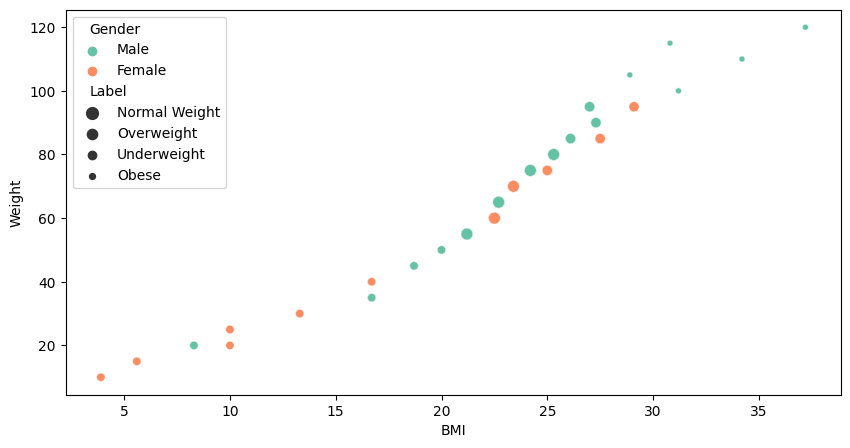

In [ ]:
#Lakukan visualisasi untuk melihat data
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(1, figsize = (10, 5))
sns.scatterplot(
    data = dataset,
    x="BMI",
    y="Weight",
    hue = "Gender",
    size="Label",
    palette="Set2"
);

#**Ekstraksi Fitur: Membangun model**

lakukan normalisasi data sebelum pemodelan pengelompokan

In [ ]:
#Lakukan normalizing
from sklearn import preprocessing
x = dataset.drop(['Gender', 'Label'], axis=1)
x_norm = preprocessing.normalize(x)

In [ ]:
from sklearn.decomposition import PCA

#reducing data menggunakan pca
pca = PCA(n_components = 2)
x_principal = pca.fit_transform(x_norm)
x_principal = pd.DataFrame(x_principal)
x_principal.columns = ['P1', 'P2']

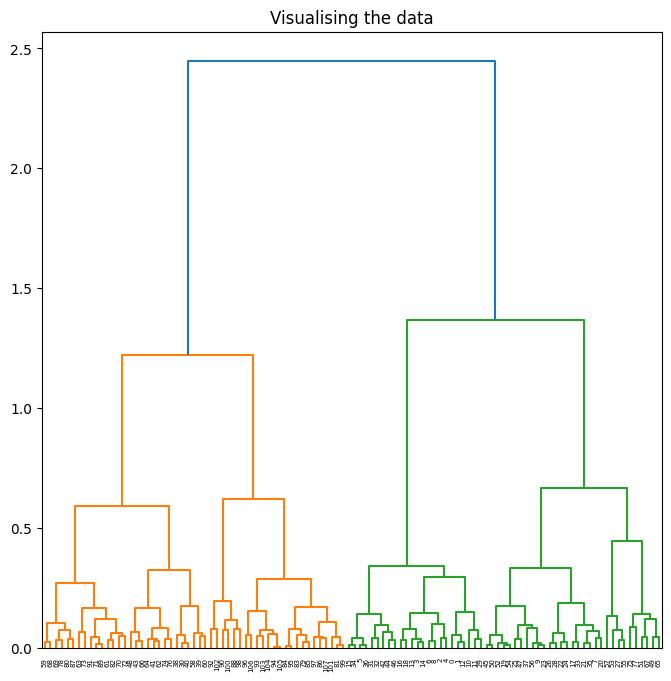

In [ ]:
import scipy.cluster.hierarchy as shc

#visual dendrogram
plt.figure(figsize =(8, 8))
plt.title('Visualising the data')
Dendrogram = shc.dendrogram((shc.linkage(x_principal, method ='ward')))

Lakukan clustering dengan KMeans

In [ ]:
#lakukan elbow method dahulu
import numpy as np
from sklearn.cluster import KMeans


def elbow_plot(data, clusters):
  inertia = []
  for n in range(1, clusters):
    algorithm = KMeans(
        n_clusters = n,
        init="k-means++",
        random_state=125,
    )
    algorithm.fit(data)
    inertia.append(algorithm.inertia_)

    #plot
    plt.plot(np.arange(1, clusters), inertia, 'o')
    plt.plot(np.arange(1, clusters), inertia, '-', alpha = 0.5)
    plt.xlabel('Number of Clusters'), plt.ylabel('Inertia')
    plt.show();

In [ ]:
# lakukan Kmeans Clustering
algorithm = KMeans(n_clusters = 3, init="k-means++", random_state=125)
algorithm.fit(x_norm)
labels = algorithm.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


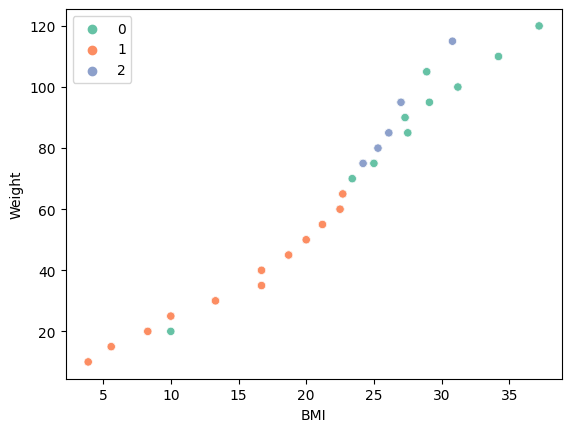

In [ ]:
#gunakan scatterplot untuk memvisualisasikan ketiga cluster dg variabel ditentukan
sns.scatterplot(data = x, x = "BMI", y="Weight", hue = labels, palette="Set2");


clustering dengan agglomerative (hanya sampai k 3)

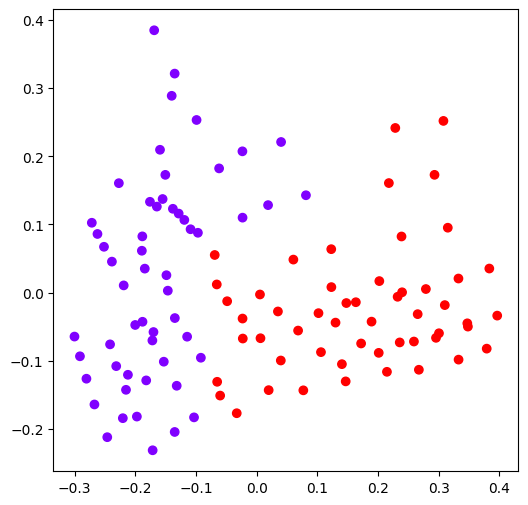

In [ ]:
ac2 = AgglomerativeClustering(n_clusters = 2)

# Visualizing the clustering
plt.figure(figsize =(6, 6))
plt.scatter(x_principal['P1'], x_principal['P2'],
           c = ac2.fit_predict(x_principal), cmap ='rainbow')
plt.show()

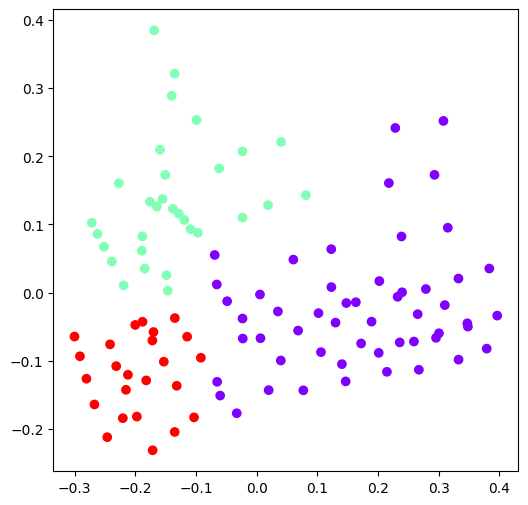

In [ ]:
ac3 = AgglomerativeClustering(n_clusters = 3)

plt.figure(figsize =(6, 6))
plt.scatter(x_principal['P1'], x_principal['P2'],
           c = ac3.fit_predict(x_principal), cmap ='rainbow')
plt.show()

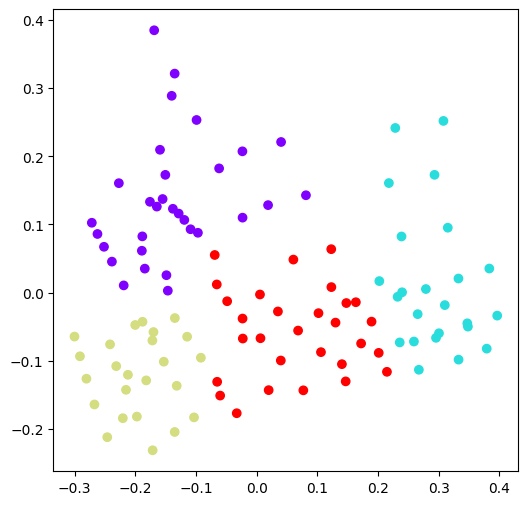

In [ ]:
ac4 = AgglomerativeClustering(n_clusters = 4)

plt.figure(figsize =(6, 6))
plt.scatter(x_principal['P1'], x_principal['P2'],
            c = ac4.fit_predict(x_principal), cmap ='rainbow')
plt.show()

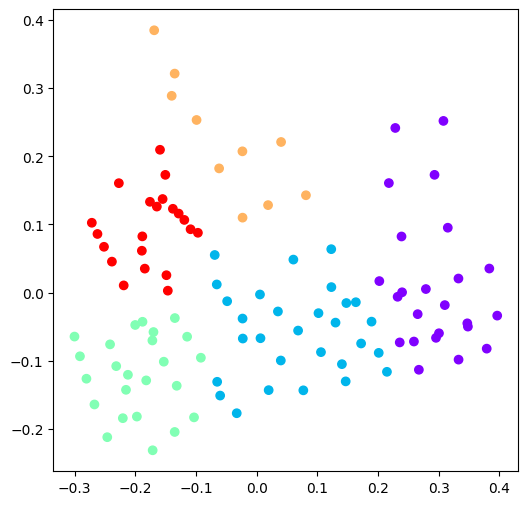

In [ ]:
ac5 = AgglomerativeClustering(n_clusters = 5)

plt.figure(figsize =(6, 6))
plt.scatter(x_principal['P1'], x_principal['P2'],
            c = ac5.fit_predict(x_principal), cmap ='rainbow')
plt.show()

#**Evaluasi Model:**

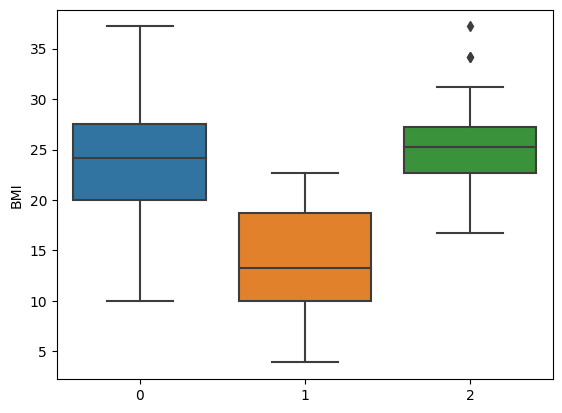

In [ ]:
#visualisasikan evaluasi diagram kotak skor KMeans clustering
sns.boxplot(x = labels, y = x['BMI']);

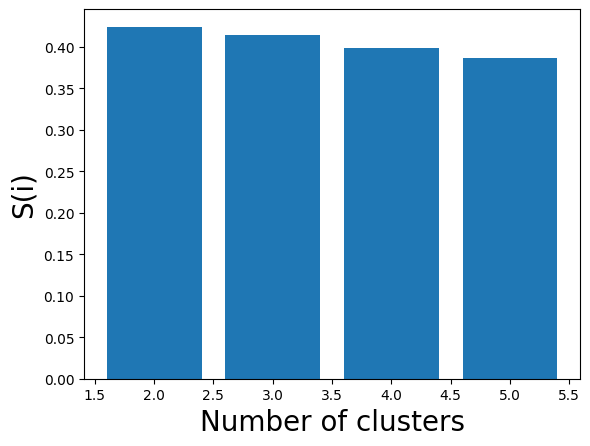

In [ ]:
#evaluasi agglomeraive hasil antara aglomerative 2 dan 3
k = [2, 3, 4, 5]

# Appending the silhouette scores of the different models to the list
silhouette_scores = []
silhouette_scores.append(
        silhouette_score(x_principal, ac2.fit_predict(x_principal)))
silhouette_scores.append(
        silhouette_score(x_principal, ac3.fit_predict(x_principal)))
silhouette_scores.append(
        silhouette_score(x_principal, ac4.fit_predict(x_principal)))
silhouette_scores.append(
        silhouette_score(x_principal, ac5.fit_predict(x_principal)))
# Plotting a bar graph to compare the results
plt.bar(k, silhouette_scores)
plt.xlabel('Number of clusters', fontsize = 20)
plt.ylabel('S(i)', fontsize = 20)
plt.show()